<a href="https://colab.research.google.com/github/hkyoo52/CV/blob/main/%EC%8B%9C%EA%B0%81%ED%99%94_%EC%B0%A8%ED%8A%B8%EC%9D%98%EC%9A%94%EC%86%8C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#시각화

**Title** : 가장 큰 주제를 설명

**Label** : 축에 해당하는 데이터 정보 제공

**Tick Label** : 축에 눈금을 사용하여 스케일 정보 추가

**Legend** : 한 그래프에서 2개 이상의 서로 다른 데이터를 분류하기 위해서 사용하는 보조 정보

**Annotation(Text)** : 그 외의 시각화에 대한 설명 추가



![image](https://user-images.githubusercontent.com/63588046/152458137-a71d61fd-0b5b-4a7c-9317-934dc31d7bec.png)


In [ ]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

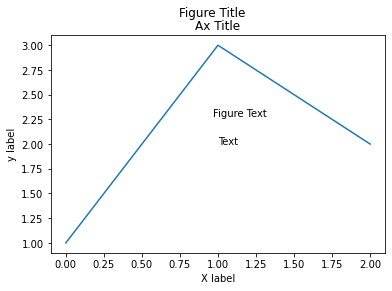

In [ ]:
fig,ax=plt.subplots()
fig.suptitle('Figure Title')
ax.plot([1,3,2],label='legend')
ax.set_title('Ax Title')
ax.set_xlabel('X label')
ax.set_ylabel('y label')
ax.text(x=1,y=2,s='Text')
fig.text(0.5,0.6,s='Figure Text')
plt.show()

Text(0.5, 0.5, 'Text\nis Important')

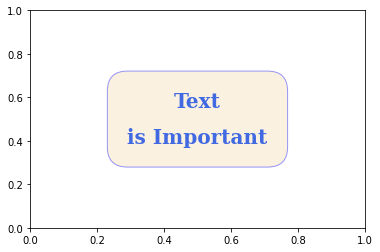

In [ ]:
fig,ax=plt.subplots()
ax.text(x=0.5,y=0.5,s='Text\nis Important',
        fontsize=20,
        fontweight='bold',
        fontfamily='serif',
        color='royalblue',
        linespacing=2,
        va='center',      # Top,center,bottom
        ha='center',      # left,center,right
        #rotation='vertical',   # 이거 쓰면 글씨 방향이 바뀜
        bbox=dict(boxstyle='round',facecolor='wheat',ec='blue',pad=1,alpha=0.4)
        )

In [ ]:
student=pd.read_csv('/content/drive/MyDrive/부스트캠프/시각화/StudentsPerformance.csv')
student.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


### **Title & Label**

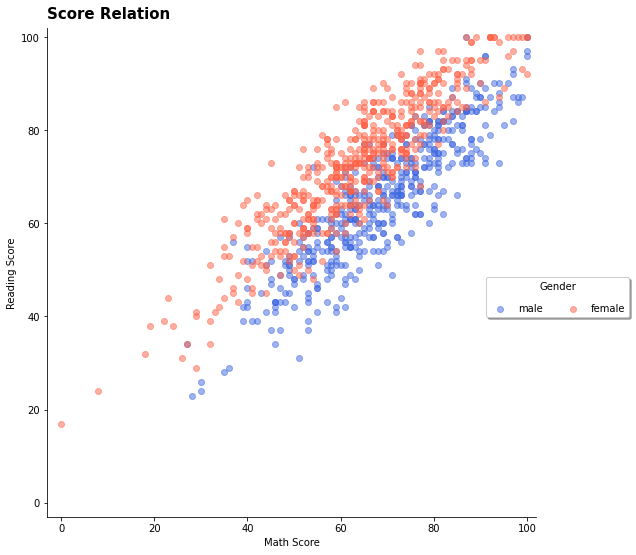

In [ ]:
fig = plt.figure(figsize=(9,9))
ax=fig.add_subplot(1,1,1,aspect=1)      # x축 길이와 y축 길이의 비가 1:1

for g,c in zip(['male','female'],['royalblue','tomato']):
  student_sub=student[student['gender']==g]
  ax.scatter(x=student_sub['math score'],y=student_sub['reading score'],c=c,alpha=0.5,label=g)

ax.set_xlim(-3,102)
ax.set_ylim(-3,102)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel('Math Score')
ax.set_ylabel('Reading Score')

ax.set_title('Score Relation',
             loc='left', va='bottom',
             fontweight='bold',fontsize=15)

ax.legend(title='Gender',
          shadow=True,
          labelspacing=1.2,
          #loc='lower_right,            # 위 아래 등 위치 지정
          #bbox_to_anchor=[1.2,0.5],    # 직접 위치 지정
          ncol=2                        # 한번에 옆으로 몇개끼지 보여줄 것인가
          )
plt.show()

### **Ticks & Text**

In [ ]:
def score_band(x):
  tmp=(x+9)//10
  if tmp<=1:
    return '0-10'
  return f'{tmp*10-9}-{tmp*10}'

student['math-range']=student['math score'].apply(score_band)
student['math-range'].value_counts().sort_index()

0-10        2
11-20       2
21-30      12
31-40      34
41-50     100
51-60     189
61-70     270
71-80     215
81-90     126
91-100     50
Name: math-range, dtype: int64

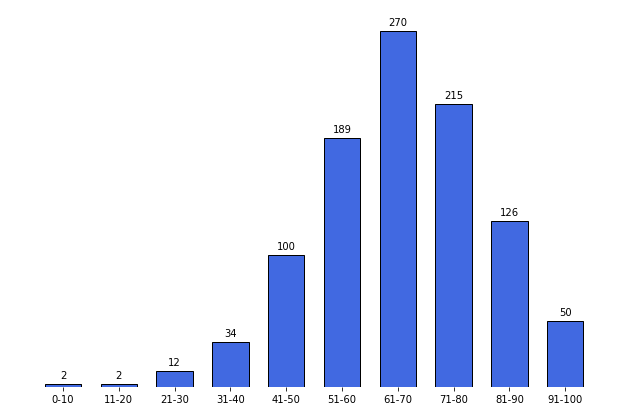

In [ ]:
math_grade=student['math-range'].value_counts().sort_index()
fig,ax=plt.subplots(1,1,figsize=(11,7))
ax.bar(math_grade.index,math_grade,width=0.65,color='royalblue',linewidth=1,edgecolor='black')
ax.set_yticks([])
ax.set(frame_on=False)

for idx, val in math_grade.iteritems():
  ax.text(x=idx,y=val+3 ,s=val,
          va='bottom', ha='center')

ax.margins(0.07)
plt.show()

### **Anotation**

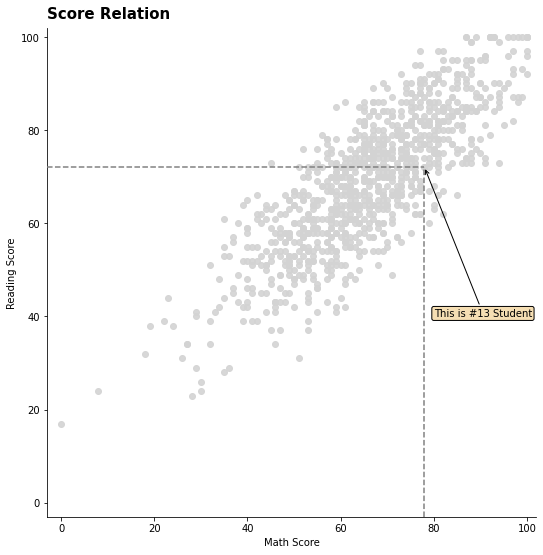

In [ ]:
fig = plt.figure(figsize=(9,9))
ax=fig.add_subplot(1,1,1,aspect=1)

ax.scatter(x=student['math score'],y=student['reading score'],c='lightgray',alpha=0.9,zorder=5)

ax.set_xlim(-3,102)
ax.set_ylim(-3,102)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.set_xlabel('Math Score')
ax.set_ylabel('Reading Score')

ax.set_title('Score Relation',
             loc='left', va='bottom',
             fontweight='bold',fontsize=15)

i=13
# x축과 평행한 직선
ax.plot([-3,student['math score'][i]],[student['reading score'][i]]*2,
        color='gray',linestyle='--',zorder=8)
# y축과 평행한 직선
ax.plot([student['math score'][i]]*2,[-3,student['reading score'][i]],
        color='gray',linestyle='--',zorder=8)

bbox=dict(boxstyle='round',fc='wheat',pad=0.2)
arrowprops=dict(arrowstyle='->')

ax.annotate(s=f'This is #{i} Student',
            xy=(student['math score'][i],student['reading score'][i]),
            xytext=[80,40], 
            bbox=bbox, 
            arrowprops=arrowprops, 
            zorder=9)

plt.show()

# Color
* 명도 대비 : 밝은 색과 어두운 색을 배치하면 밝은 색은 더 밝게, 어두운 색은 더 어둡게 보임
* 색상 대비 : 가까운 색은 차이가 더 크게 보임(파랑,보라)
* 채도 대비 : 채도의 차이, 채도가 더 높아보임(회색,주황)
* 보색 대비 : 정반대 색상을 사용하면 더 선명해 보임(빨강,초록)

<function matplotlib.pyplot.show>

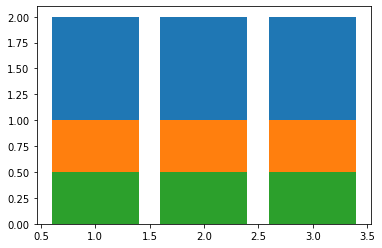

In [ ]:
fig,ax=plt.subplots()
ax.bar([1,2,3],[2,2,2])
ax.bar([1,2,3],[1,1,1])
ax.bar([1,2,3],[0.5,0.5,0.5])
plt.show

In [ ]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

student=pd.read_csv('/content/drive/MyDrive/부스트캠프/시각화/StudentsPerformance.csv')
student.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [ ]:
groups=sorted(student['race/ethnicity'].unique())
gton=dict(zip(groups,range(5)))
student['color']=student['race/ethnicity'].map(gton)

In [ ]:
print(plt.cm.get_cmap('tab10').colors)

((0.12156862745098039, 0.4666666666666667, 0.7058823529411765), (1.0, 0.4980392156862745, 0.054901960784313725), (0.17254901960784313, 0.6274509803921569, 0.17254901960784313), (0.8392156862745098, 0.15294117647058825, 0.1568627450980392), (0.5803921568627451, 0.403921568627451, 0.7411764705882353), (0.5490196078431373, 0.33725490196078434, 0.29411764705882354), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902), (0.4980392156862745, 0.4980392156862745, 0.4980392156862745), (0.7372549019607844, 0.7411764705882353, 0.13333333333333333), (0.09019607843137255, 0.7450980392156863, 0.8117647058823529))


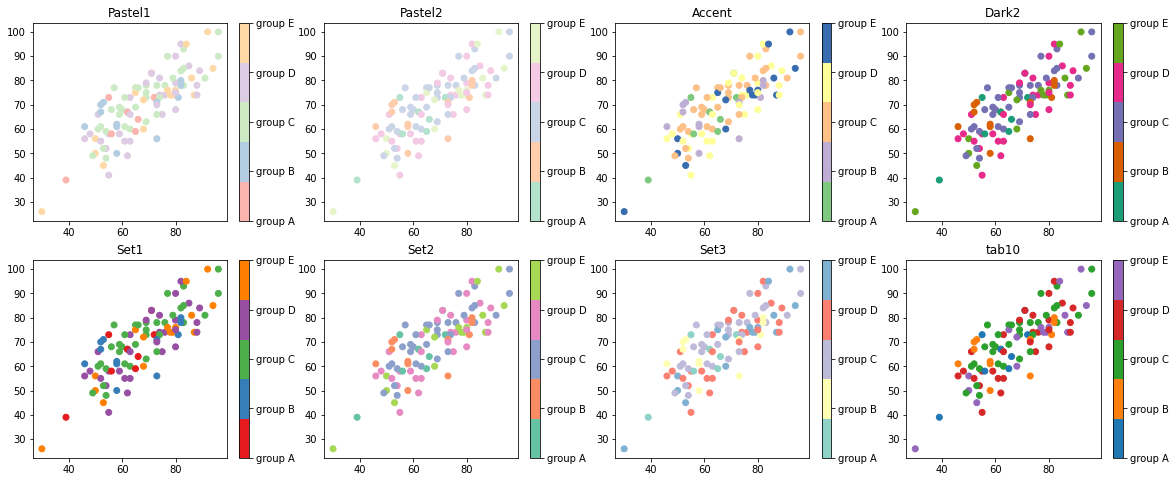

In [ ]:
from matplotlib.colors import ListedColormap
qualitative_cm_list=['Pastel1','Pastel2','Accent','Dark2','Set1','Set2','Set3','tab10']

fig,axes=plt.subplots(2,4,figsize=(20,8))
axes=axes.flatten()
student_sub=student.sample(100)

for idx,cm in enumerate(qualitative_cm_list):
  pcm=axes[idx].scatter(student_sub['math score'],student_sub['reading score'],
                        c=student_sub['color'], cmap=ListedColormap(plt.cm.get_cmap(cm).colors[:5]))
  
  char=fig.colorbar(pcm,ax=axes[idx],ticks=range(5)) # 칼라바 옆에 만들기
  char.ax.set_yticklabels(groups)                    # 칼라바에 label 붙이기
  axes[idx].set_title(cm)

plt.show()
  

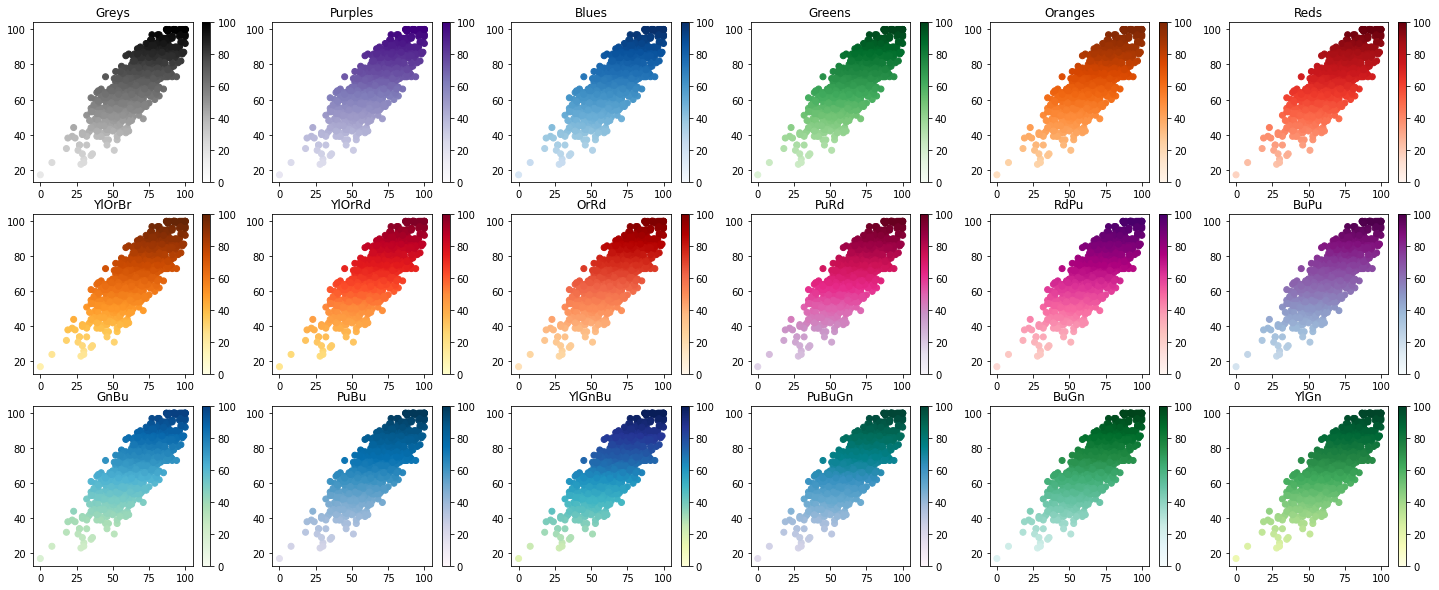

In [ ]:
from matplotlib.colors import ListedColormap
qualitative_cm_list=['Greys','Purples','Blues','Greens','Oranges','Reds',
                     'YlOrBr','YlOrRd','OrRd','PuRd','RdPu','BuPu',
                     'GnBu','PuBu','YlGnBu','PuBuGn','BuGn','YlGn']   # 지정된 색들

fig,axes=plt.subplots(3,6,figsize=(25,10))
axes=axes.flatten()

student_sub=student.sample(100)

for idx,cm in enumerate(qualitative_cm_list):
  pcm=axes[idx].scatter(student['math score'],student['reading score'],
                        c=student['reading score'], 
                        cmap=cm, vmin=0, vmax=100)
  
  fig.colorbar(pcm,ax=axes[idx]) # 칼라바 옆에 만들기
  axes[idx].set_title(cm)

plt.show()

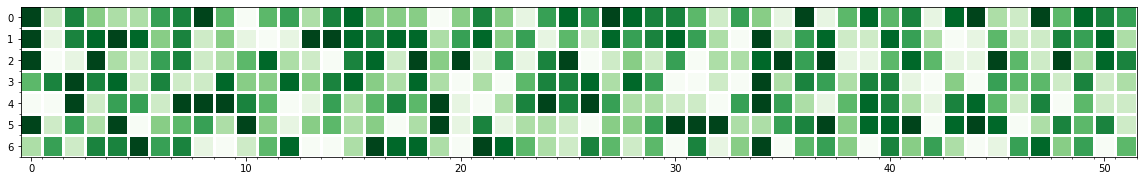

In [ ]:
im=np.random.randint(10,size=(7,52))
fig, ax=plt.subplots(figsize=(20,5))
ax.imshow(im,cmap='Greens')
ax.set_yticks(np.arange(7)+0.5,minor=True)                      # grid 부분에 두께 설정
ax.set_xticks(np.arange(52)+0.5,minor=True)                     
ax.grid(which='minor',color='w',linestyle='-',linewidth=3)      #흰색으로 grid를 만들어라
plt.show()

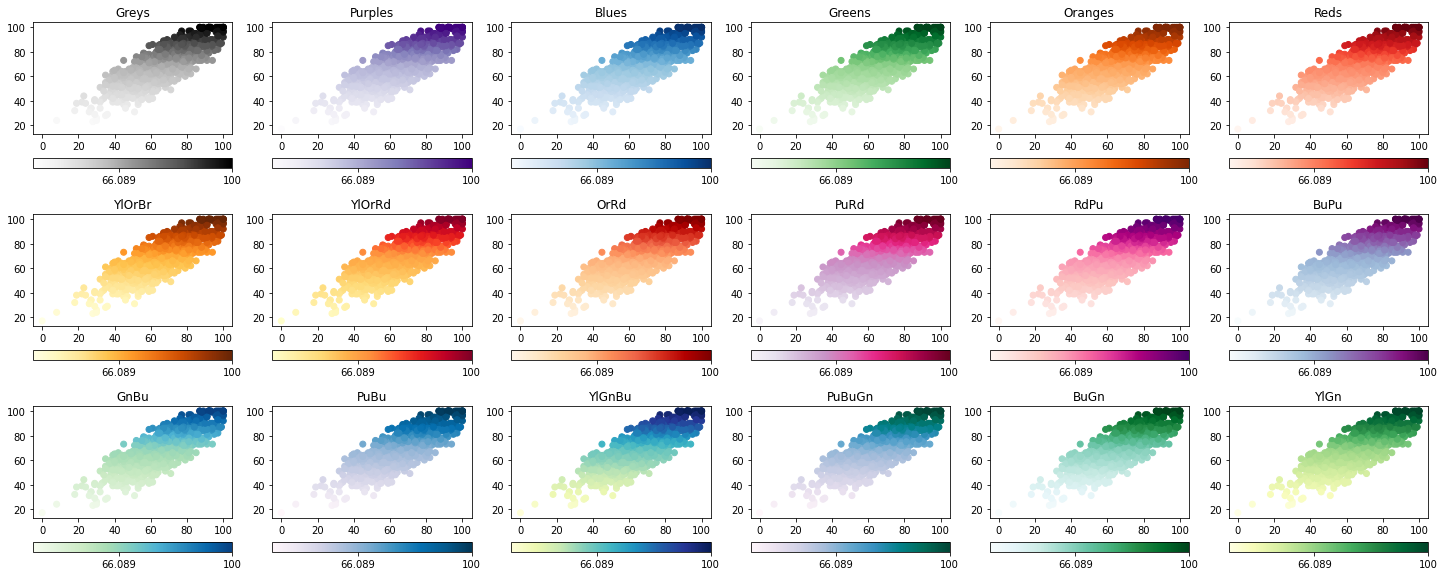

In [ ]:
# 평균 대비 얼마나 멀엊 있는가
from matplotlib.colors import TwoSlopeNorm

qualitative_cm_list=['Greys','Purples','Blues','Greens','Oranges','Reds',
                     'YlOrBr','YlOrRd','OrRd','PuRd','RdPu','BuPu',
                     'GnBu','PuBu','YlGnBu','PuBuGn','BuGn','YlGn']   # 지정된 색들

fig,axes=plt.subplots(3,6,figsize=(25,10))
axes=axes.flatten()

offset=TwoSlopeNorm(vmin=0,vcenter=student['reading score'].mean(),vmax=100)

student_sub=student.sample(100)

for idx,cm in enumerate(qualitative_cm_list):
  pcm=axes[idx].scatter(student['math score'],student['reading score'],
                        c=offset(student['reading score']), 
                        cmap=cm)
  
  char=fig.colorbar(pcm,ax=axes[idx],ticks=[0,0.5,1],orientation='horizontal') # 칼라바 옆에 만들기
  char.ax.set_xticklabels([0,student['math score'].mean(),100])                    # 칼라바에 label 붙이기
  axes[idx].set_title(cm)

plt.show()

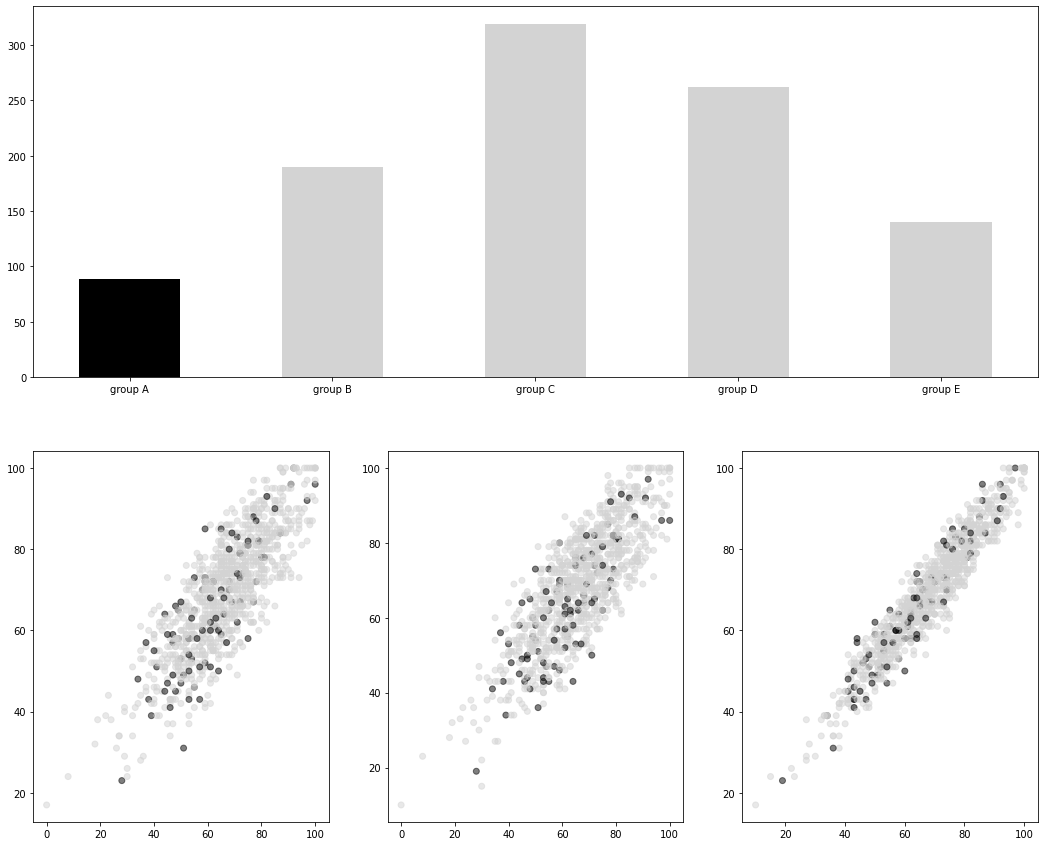

In [ ]:
# 색상 대비
a_color,note_color='black','lightgray'
colors=student['race/ethnicity'].apply(lambda x : a_color if x=='group A' else note_color)

color_bars=[a_color]+[note_color]*4
fig=plt.figure(figsize=(18,15))
groups=student['race/ethnicity'].value_counts().sort_index()

ax_bar=fig.add_subplot(2,1,1)
ax_bar.bar(groups.index,groups,color=color_bars,width=0.5)

ax_s1=fig.add_subplot(2,3,4)
ax_s2=fig.add_subplot(2,3,5)
ax_s3=fig.add_subplot(2,3,6)

ax_s1.scatter(student['math score'],student['reading score'],color=colors,alpha=0.5)
ax_s2.scatter(student['math score'],student['writing score'],color=colors,alpha=0.5)
ax_s3.scatter(student['writing score'],student['reading score'],color=colors,alpha=0.5)

# Facet(Multiple View)
* 분할을 의미
* 서로 다른 인코딩을 통해 보여줌
* 같은 방법으로 동시에 여러 feature 보여줌
* 부분 집합을 자세히 보여줌

**fig.add_grid_spec()** : 서브플롯 크기 지정
**ax.inset_axes()** : 서브플롯 내부에 플롯 그리기
**make_axes_locatable(ax)** : 플롯 옆에 추가

In [ ]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

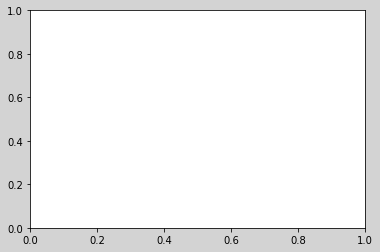

In [ ]:
# figure 색 입히기
fig, ax=plt.subplots()
fig.set_facecolor('lightgray')
plt.show()

In [ ]:
# fig 저장하는 법, 중요!!!!

#fig.savefig('파일 이름',dpi=150(해상도))

In [ ]:
# 차원 늘리기


In [ ]:
student=pd.read_csv('/content/drive/MyDrive/부스트캠프/시각화/StudentsPerformance.csv')
student.head()

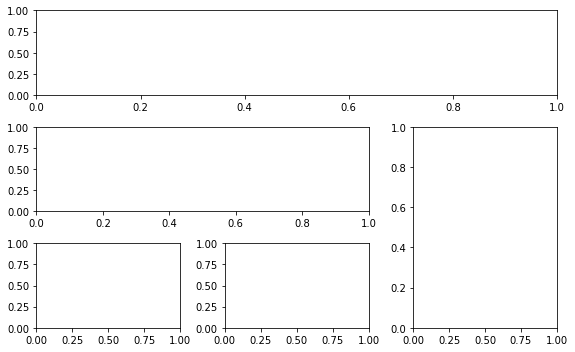

In [ ]:
# 각 plot 크기 설정
fig=plt.figure(figsize=(8,5))
gs=fig.add_gridspec(3,3)
ax=[None for _ in range(5)]

ax[0]=fig.add_subplot(gs[0,:])
ax[1]=fig.add_subplot(gs[1,:-1])
ax[2]=fig.add_subplot(gs[1:,-1])
ax[3]=fig.add_subplot(gs[-1,0])
ax[4]=fig.add_subplot(gs[-1,-2])

plt.tight_layout()
plt.show()

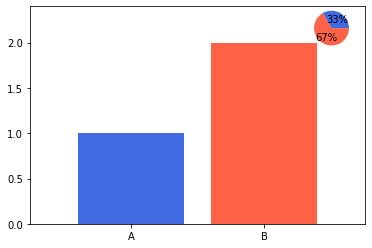

In [ ]:
# plot 안에 subplot 추가
fig, ax=plt.subplots()
color=['royalblue','tomato']
ax.bar(['A','B'],[1,2],color=color)
ax.margins(0.2)
axin=ax.inset_axes([0.8,0.8,0.2,0.2])
axin.pie([1,2],colors=color,autopct='%1.0f%%')
plt.show()

# Grid
* 색(color)
* 맨 밑에 오도록 조정 (**zorder**)
* 격자 세부 조정(**which='major','minor','both'**)
* X축?, Y축?, 동시에?(**axis='x','y','both'**)



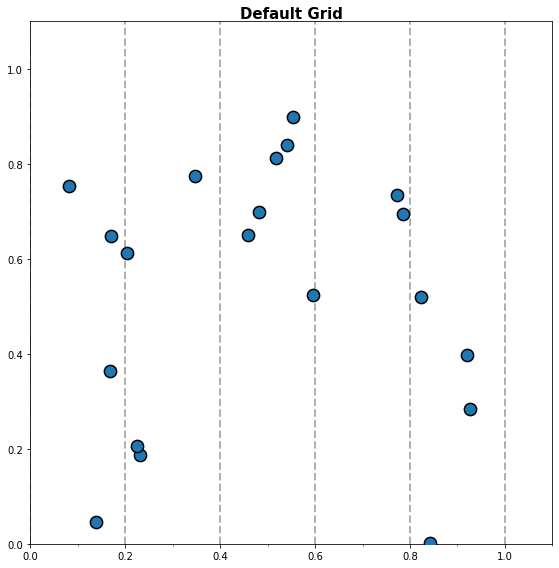

In [ ]:
np.random.seed(124235)
x=np.random.rand(20)
y=np.random.rand(20)

fig=plt.figure(figsize=(16,8))
ax=fig.add_subplot(1,1,1,aspect=1)

ax.scatter(x,y,s=150, linewidth=1.5,edgecolor='black',zorder=10)

ax.set_xticks(np.linspace(0,1.1,12,endpoint=True),minor=True)   # 0.1 단위로 눈금 만듬

ax.set_xlim(0,1.1)
ax.set_ylim(0,1.1)

ax.grid(zorder=0,linestyle='--', axis='x', linewidth=2)      # axis는 'x','y',both' 중 하나로 선택
ax.set_title(f'Default Grid',fontsize=15,va='center',fontweight='semibold')
plt.tight_layout()
plt.show()

### x+y=c 같은 구조로도 만들 수 있음

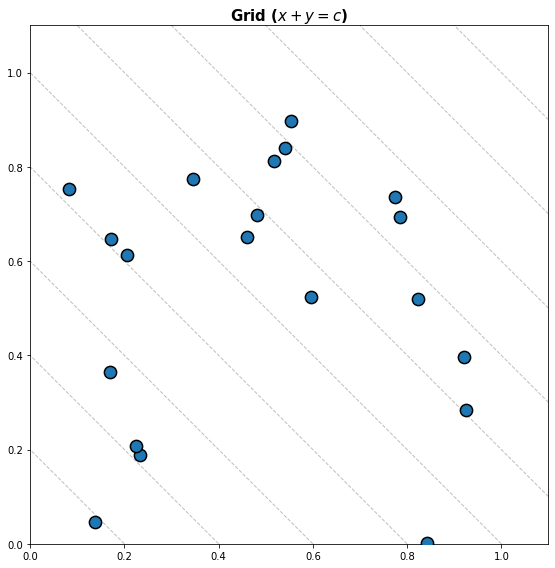

In [ ]:
fig=plt.figure(figsize=(16,8))
ax=fig.add_subplot(1,1,1,aspect=1)

ax.scatter(x,y,s=150, linewidth=1.5,edgecolor='black',zorder=10)

x_start=np.linspace(0,2.2,12,endpoint=True)   # 0.1 단위로 눈금 만듬

for xs in x_start:
  ax.plot([xs,0],[0,xs],linestyle='--',color='gray',alpha=0.5,linewidth=1)

ax.set_xlim(0,1.1)
ax.set_ylim(0,1.1)

ax.set_title(f'Grid ($x+y=c$)',fontsize=15,va='center',fontweight='semibold')
plt.tight_layout()
plt.show()

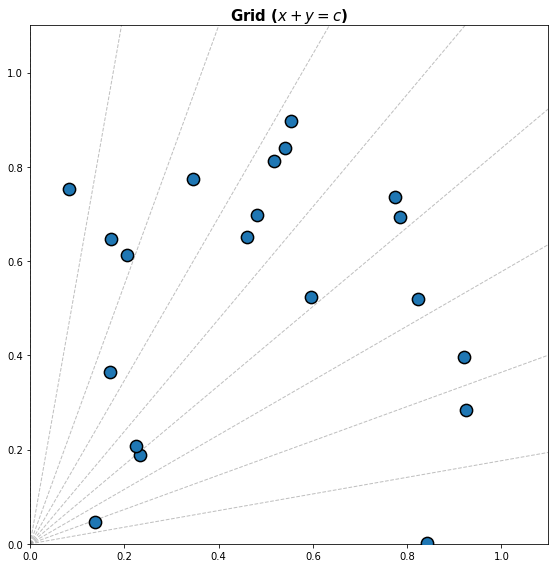

In [ ]:
fig=plt.figure(figsize=(16,8))
ax=fig.add_subplot(1,1,1,aspect=1)

ax.scatter(x,y,s=150, linewidth=1.5,edgecolor='black',zorder=10)

radian=np.linspace(0,np.pi/2,10,endpoint=True)   # 0.1 단위로 눈금 만듬

for rad in radian:
  ax.plot([0,2],[0,2*np.tan(rad)],linestyle='--',color='gray',alpha=0.5,linewidth=1)

ax.set_xlim(0,1.1)
ax.set_ylim(0,1.1)

ax.set_title(f'Grid ($y=x+c$)',fontsize=15,va='center',fontweight='semibold')
plt.tight_layout()
plt.show()

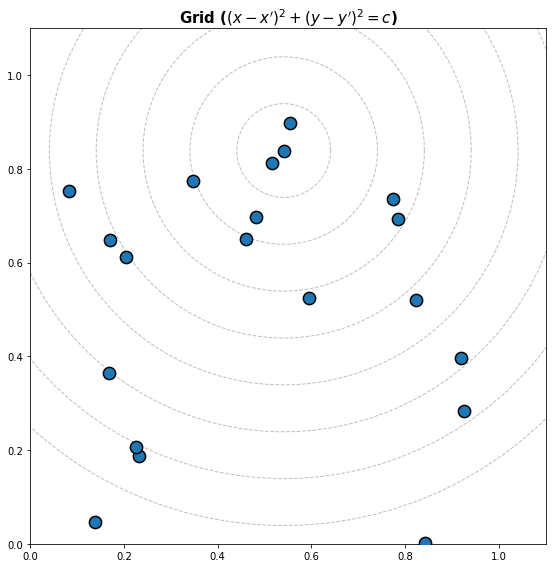

In [ ]:
fig=plt.figure(figsize=(16,8))
ax=fig.add_subplot(1,1,1,aspect=1)

ax.scatter(x,y,s=150, linewidth=1.5,edgecolor='black',zorder=10)

ra=np.linspace(0.1,0.8,8,endpoint=True)   # 0.1 단위로 눈금 만듬

for r in ra:
  xx=r*np.cos(np.linspace(0,np.pi*2,100))
  yy=r*np.sin(np.linspace(0,np.pi*2,100))
  ax.plot(xx+x[4],yy+y[4],linestyle='--',color='gray',alpha=0.5,linewidth=1)

ax.set_xlim(0,1.1)
ax.set_ylim(0,1.1)

ax.set_title(f"Grid ($(x-x')^2+(y-y')^2=c$)",fontsize=15,va='center',fontweight='semibold')
plt.tight_layout()
plt.show()

### line : 선 추가하기

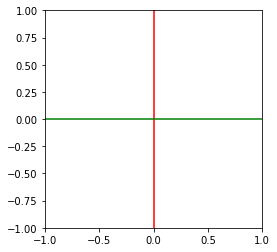

In [ ]:
fig,ax=plt.subplots()
ax.set_aspect(1)
ax.axvline(0,color='red')
ax.axhline(0,color='green')

ax.set_xlim(-1,1)
ax.set_ylim(-1,1)
plt.show()

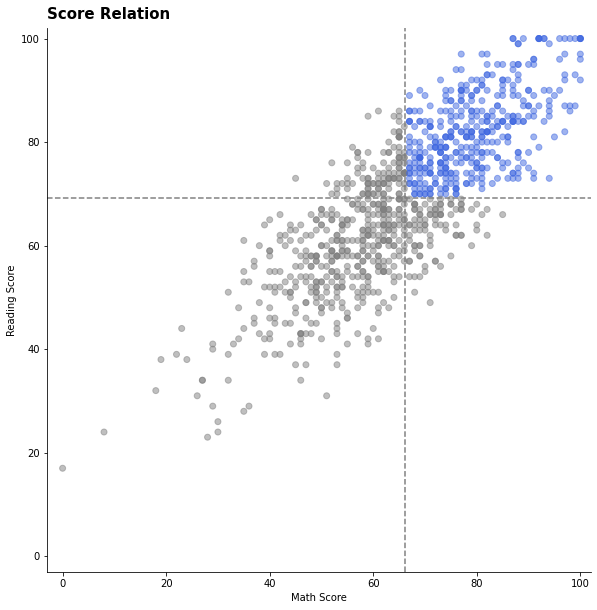

In [ ]:
fig, ax= plt.subplots(figsize=(10,10))
ax.set_aspect(1)

math_mean=student['math score'].mean()
reading_mean=student['reading score'].mean()

ax.axvline(math_mean,color='gray',linestyle='--')
ax.axhline(reading_mean,color='gray',linestyle='--')

ax.scatter(x=student['math score'],y=student['reading score'],
           c=['royalblue' if m>math_mean and r>reading_mean else 'gray' for m,r in zip(student['math score'],student['reading score'])],
           alpha=0.5,zorder=10)

ax.set_xlim(-3,102)
ax.set_ylim(-3,102)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.set_xlabel('Math Score')
ax.set_ylabel('Reading Score')

ax.set_title('Score Relation',
             loc='left', va='bottom',
             fontweight='bold',fontsize=15)

plt.show()

### spine : 면 추가하기
**ax.spines**
  - set_visible
  - set_linewidth
  - set_position

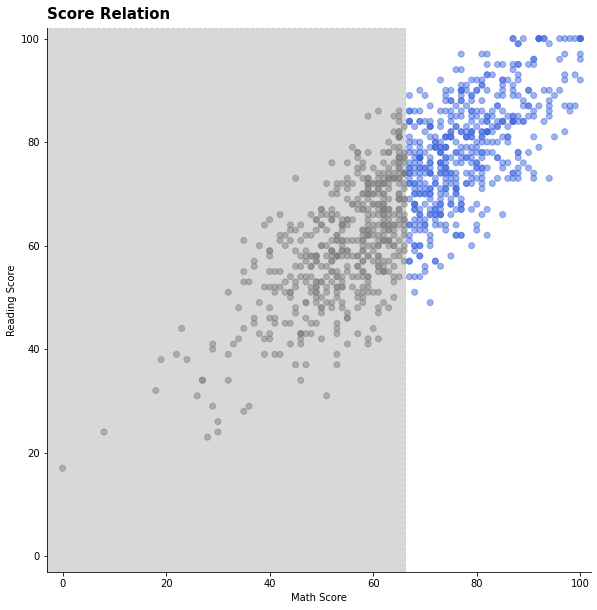

In [ ]:
fig, ax= plt.subplots(figsize=(10,10))
ax.set_aspect(1)

math_mean=student['math score'].mean()
reading_mean=student['reading score'].mean()

ax.axvspan(-3,math_mean,color='gray',linestyle='--',zorder=0,alpha=0.3)

ax.scatter(x=student['math score'],y=student['reading score'],
           c=['royalblue' if m>math_mean else 'gray' for m in student['math score']],
           alpha=0.5,zorder=10)

ax.set_xlim(-3,102)
ax.set_ylim(-3,102)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.set_xlabel('Math Score')
ax.set_ylabel('Reading Score')

ax.set_title('Score Relation',
             loc='left', va='bottom',
             fontweight='bold',fontsize=15)

plt.show()

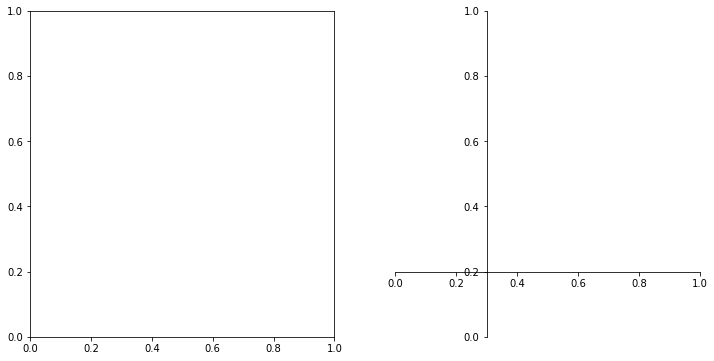

In [ ]:
fig=plt.figure(figsize=(12,6))
_=fig.add_subplot(1,2,1)
ax=fig.add_subplot(1,2,2)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# 축을 옮기기
ax.spines['left'].set_position(('data',0.3))
ax.spines['bottom'].set_position(('axes',0.2))
plt.show()

### setting 바꾸기

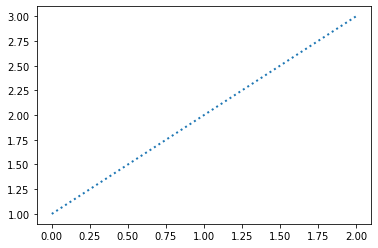

In [ ]:
# 모든 그래프 두꺼운 선 점선으로 표시

plt.rcParams['lines.linewidth']=2
plt.rcParams['lines.linestyle']=':'

plt.plot([1,2,3])

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


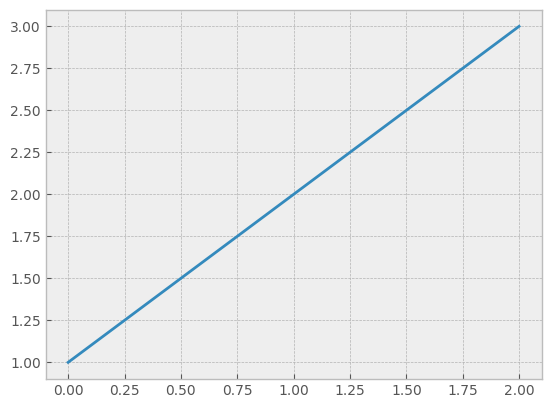

In [ ]:
# 테마 바꾸기
print(mpl.style.available)

plt.style.use('bmh')
plt.plot([1,2,3])

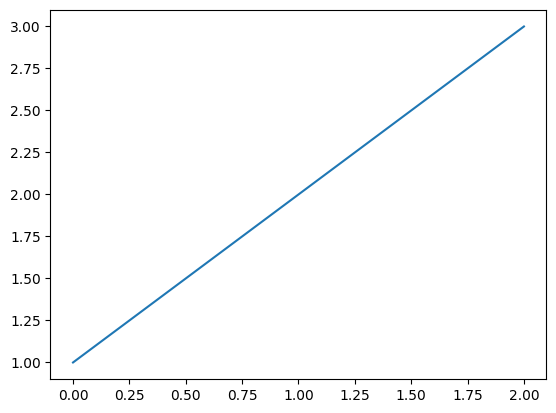

In [ ]:
# 초기화
plt.rcParams.update(plt.rcParamsDefault)
plt.plot([1,2,3])